# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Feature Selection
Week 5 | Lesson 4.1

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- describe what feature selection means and why it is important
- evaluate several techniques for feature selection
- use L1 and L2 regularization for feature selection

### STUDENT PRE-WORK
*Before this lesson, you should already be able to:*
- perform regression
- perform classification

<a name="opening"></a>
## Opening
In this class we will go over feature selection.
Feature selection is an important part of the model building process and there are several ways to approach it.

**Check:** Can anyone guess why we may want to select features?


<a name="introduction"></a>
## Introduction: Feature Selection

In machine learning we usually start from a vector of features that encapsulate different aspects of our data and we use these to train a model that predicts a target variable.
Many of the datasets we have encountered so far were in tabular format, and features were well defined already. This is often not the case at all!

**Check** Can you give a couple of examples of data where features must be extracted?


For example, in the case of text data, a data-point usually corresponds to a document or a sentence, and we have to use feature extraction techniques to map each document to a vector of numbers. Similarly, to classify images, we must first represent them as a vector of numbers.
As we have seen with the `CountVectorizer` for text data, feature extraction can result in a very large number of features, some of which may have more predictive power than others.

|Text|the|cat|is|on|table|blue|sky|...|
|----|
|The cat is on the table|2|1|1|1|1|0|0|...|
|The table is blue|1|0|1|0|1|1|0|...|
|The sky is blue|1|0|1|0|0|0|1|...|
|...|...|...|...|...|...|...|...|...|

In the above example the word `the` probably has zero predictive power.

In a different scenario, the tabular data may be a result of a database dump where irrelevant columns were not removed.


|CustomerID |CompanyName |ContactName | ContactTitle |Address|City | Region | PostalCode | Country |Phone | Fax|
|---|
|ALFKI| Alfreds Futterkiste| Maria Anders | Sales Representative | Obere Str. 57 | Berlin|| 12209| Germany | 030-0074321| 030-0076545|
|ANATR| Ana Trujillo Emparedados y helados | Ana Trujillo | Owner| Avda. de la Constitución 2222 | México D.F. || 05021| Mexico| (5) 555-4729 | (5) 555-3745|
|ANTON| Antonio Moreno Taquería| Antonio Moreno | Owner| Mataderos2312 | México D.F. || 05023| Mexico| (5) 555-3932 ||
|...|...|...|...|...|...|...|...|...|...|...|

Feature Selection is a way to reduce the number of features to simplify the model while retaining its predictive power.



### Bottom up feature selection / forward stepwise selection

One way to select features is to start with no predictors, so for example a logistic regression against a constant as the sole feature. We then add in each of the p possible features and find the single feature that gives the highest score metric we are testing, and then iteratively add the other features one by one, each time checking how much the score improves and adding specifically the one feature that improves the score the most each time. Score improvement will hence be smaller and smaller the more features we add; adding complexity to the model will yield diminishing returns.

One can then set a criteria to only retain the first N features or the first features that achieve e.g. 90% as good a score as the model with all p features (bear in mind this could be _a lot_ fewer features than p).

You might notice that we do not test every possible model this way, what about all the other combinations of features that are possible? This process is computationally more feasible than an approach taking all possible combinations and likely to yield similar results. Fitting all possible feature combinations is known as the **best subset selection**.

For 20 possible features, there are 211 models to be tested in forward stepwise selection. For best subset selection, there are 1,048,576 models to be tested. How long do you have? 


### Top Down feature selection / backward stepwise selection, and hybrid approaches

Obviously, we can do this process in reverse and start with the full model with all features and remove the least predictive one at each step. This would not necessarily end with the same features as the forward stepwise approach. More interestingly, a hybrid approach could be taken with, e.g. a forward stepwise approach that then performans a backward analysis to check if a different feature might be removed each time a new one has been added. This more closely approximates a full best subset fit whilst still involving a smaller number of total model fits.


### Regularisation

Regularisation imposes a global constraint on the values of the parameters that define the model. The regularized model is found solving a new minimisation problem where two terms are present: the term defining the model and the term defining the regularisation.

In general, a regularisation term $R(f)$ is introduced to a general loss function:

$$\min_f \sum_{i=1}^{n} V(f(\hat x_i), \hat y_i) + \lambda R(f)$$

for a loss function $V$ that describes the cost of predicting $f(x)$ when the label is $y$, such as the square loss or hinge loss, and for the term $\lambda$ which controls the importance of the regularization term. $R(f)$ is typically a penalty on the complexity of $f$, such as restrictions for smoothness or bounds on the vector space norm.

#### l1 and l2 regularisation

To reiterate, for the case where our model $f$ is parametric (e.g. like in linear models), we can express the regularisation term as a norm on the parameters. Depending on the kind of norm chosen for the parameters regularisation can be:

l1 or Lasso regularisation:
$$ R(f) \propto \sum{|\beta_i|}$$

or

l2 or Ridge regularisation:
$$ R(f) \propto \sum{\beta_i^2}$$

where $\beta_i$ are the parameters of the model. Critically, l1 regularisation can set parameter coefficients to zero and thus act as a feature selection method.

### Feature importance

Some models offer an intrinsic way of evaluating feature importance. For example, as we will see next week, _Decision Trees_ have a way to assess how much each feature is contributing to the overall prediction.

Logistic Regression also offers an intrinsic way of assessing feature importance. In fact, since the Logistic Regression model is linear in the features, the size of each coefficient represents the impact a unit change in that feature has on the overall model. In order to interpret this as feature importance, we need to make sure that features are normalized to have the same scale, or a unit change (i.e. the coefficient) would imply varying change in the odds outcome.

<a name="demo"></a>
## Demo: Feature importance in Logistic Regression

As we have said, the coefficients in logistic regression can be interpreted as feature importance if the data is normalised. We will show this on the Iris dataset for convenience.

First load the data.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Then let's initialize a logistic regression model:

In [14]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

The `LogisticRegression` class exposes an attribute called `coef_`. Let's have a look at it:

In [15]:
model.coef_

array([[ 0.41498833,  1.46129739, -2.26214118, -1.0290951 ],
       [ 0.41663969, -1.60083319,  0.57765763, -1.38553843],
       [-1.70752515, -1.53426834,  2.47097168,  2.55538211]])

Nice! According to the documentation this is:

    coef_ : array, shape (n_classes, n_features)
        Coefficient of the features in the decision function.
        
Let's display it in a nicer way:

In [16]:
coeffs = pd.DataFrame(model.coef_, columns = iris.feature_names, index =iris.target_names)
coeffs

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,0.414988,1.461297,-2.262141,-1.029095
versicolor,0.416640,-1.600833,0.577658,-1.385538
virginica,-1.707525,-1.534268,2.470972,2.555382


**Check** Can we conclude that `petal length (cm)` is the most significant feature to identify `setosa` ?


Let's normalize the data and repeat the exercise:


In [17]:
from sklearn.preprocessing import StandardScaler
X_norm =  StandardScaler().fit_transform(X)

model.fit(X_norm, y)

coeffs = pd.DataFrame(model.coef_, columns = iris.feature_names, index =iris.target_names)
coeffs

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,-0.810166,1.393699,-1.687386,-1.518991
versicolor,0.130380,-1.246338,0.789195,-0.889440
virginica,0.012990,-0.144535,1.863173,2.698873


Notice that normalization did change the sign and magnitude of the LR coefficients. Also notice that the Logistic Regression class has a `penalty` parameter that allows us to choose between `l1` and `l2` regularization. Notice that some of the solvers only support `l2` regularization.

In [18]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**Check** Try changing the penalty to `l1`, do the coefficients change?

**Optional Check** Check score with `cross_val_score` and select best model

In [19]:
model2 = LogisticRegression(penalty='l1')
model2.fit(X_norm, y)
coeffs = pd.DataFrame(model2.coef_, columns = iris.feature_names, index =iris.target_names)
coeffs

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,0.000000,1.198029,-4.427947,0.000000
versicolor,0.029515,-1.239732,0.762604,-0.769475
virginica,0.000000,-0.480737,2.716761,4.580145


In [23]:
from sklearn.model_selection import cross_val_score
import numpy as np
accuracies = cross_val_score(model, X_norm, y, cv=5)
print("Ridge: ",np.mean(accuracies))
accuracies2 = cross_val_score(model2, X_norm, y, cv=5)
print("Lasso: ",np.mean(accuracies2))

('Ridge: ', 0.90666666666666662)
('Lasso: ', 0.93333333333333324)


<a name="guided-practice"></a>
## Guided Practice: Visualizing feature importance

In some cases we may want to visualize feature importance in a plot. One way to do this is to display the matrix of coefficients with a color scale. We can do this using matplotlib as follows:

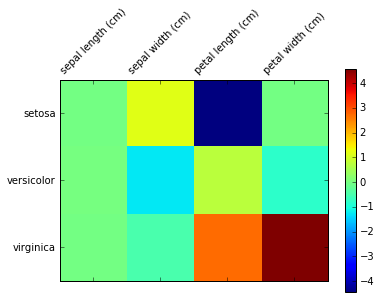

In [26]:
# first import matplolib
%matplotlib inline
import matplotlib.pyplot as plt

# then create a figure and a plot
fig = plt.figure()
ax = fig.add_subplot(111)

# display the matrix
cax = ax.matshow(coeffs)

# add colorbars and tics
ax = fig.add_subplot(111)
cax = ax.matshow(coeffs)
fig.colorbar(cax)
ax.set_xticklabels(['']+list(coeffs.columns), rotation=45)
ax.set_yticklabels(['']+list(coeffs.index))
plt.show()

<a name="ind-practice"></a>
## Independent Practice: Topic
Scikit learn offers several other regularization methods. The following exercise is in threes:

Go to the [documentation page](http://scikit-learn.org/stable/modules/feature_selection.html), pick one method and read about it for 10 minutes.

Try to answer the following questions:

1. is it top-down or bottom-up?
- does it work for both regression and classification?
- can it be used in a pipeline?

In the last 10 minutes expose your findings to the class

1. feature_selection.GenericUnivariateSelect([...])
- feature_selection.SelectPercentile([...])
- feature_selection.SelectKBest([score_func, k])
- feature_selection.SelectFpr([score_func, alpha])
- feature_selection.SelectFdr([score_func, alpha])
- feature_selection.SelectFromModel(estimator)
- feature_selection.SelectFwe([score_func, alpha])

# Recursive Feature Elimination

I will explicitly discuss recursive feature elimination (RFE) in sklearn since we use this in the upcoming lab and it might be a bit unclear. This involves fitting models several times. You fit the model once with all the features, then you drop one (or more, you can set this parameter) and then refit, then drop one and refit (until you get to the number of features you input also as a parameter at the start). How do you decide which of the features you want to drop? In the case of logistic regression it is based on the coefficient size with some extra corrections. Hence this is a version of top down (or backwards) stepwise selection, with attempts to be more intelligent than only comparing coefficient size.

# Statistical Testing for Feature Selection

Some of the methods we will see in the lab use some statistical tests to determine if features are significant. We have talked about statistical testing in the context of t-tests. In that case, we were looking to see if
two statistics (such as a mean value for the heights of a population) were significantly different from each other by assuming either a normal (for large numbers of values, where we can approximate a normal distribution) or a t (for smaller numbers of values i.e. below 30) distribution. For the normal case this is called a z-test, for the t a t-test. The distinction in the normal and t distributions was in the kurtosis, such that a t distribution would have a greater tolerance for more extreme values and judge these to be less significant than a normal distribution.

Another method used to compare two or more statistics (again such as means of heights of different subgroups of a population) at the same time is the analysis of variance (ANOVA). That's useful because the t test just compares two values. In this case an F-statistic is calculated (please note this is totally unrelated to the F1 score you calculate as a metric for classification problems) and an F-test
is performed on the F-distribution to see if the F statistic is significant, again returning a p-value.

Hence the 
flow of such tests follow the same format. You calculate a statistic (Z-statistic, t-stastic, F-statistic), compare the value to the appropriate distribution (Z distribution, which is just the normal distribution, the t distribution, or the F distribution) and return a p value giving the probability of the statistic occuring. So the difference is in the calculation of the statistic and the exact form of the distribution used for the testing. The F distribution is positively skewed, unlike the normal and t distributions which are symmetric.

For the F-statistic, we calculate a sum of the variances of each grouping compared with the overall mean of the total, and divide this by a sum of the variances of each data point within the groupings compared with the mean of that grouping (with a correction for number of terms). That is to say, _a term for the variability between groups divided by a term for the variability within groups_.


In a classification problem this can be applied by considering the groupings to be each classification outcome. So to perform the test we need to input both our feature matrix and our outputs. Then the features are subset into those corresponding to each of the possible outcomes and we see if the means of the features in each grouping are significantly different from each other. If they are not then the feature seems to not provide much predictive power. 

The equation below shows the F-statistic calculation for a binary outcome classification where (+) refers to the grouping of one outcome and (-) the grouping for the second outcome. Note that this generalises to multivariate classification, which is why it is convenient to use it even for the binary case rather than another test.

![](./assets/images/f_statistic.png)

<a name="conclusion"></a>
## Conclusion
Today we have learned about some ways to select features by importance. This will be particularly useful when we deal with a large number of features. We have already talked about regularisation strength in the context of a grid search as a more indirect method of feature selection. Now we will talk about a process of preselecting features using sklearn, in lab 4.2, in which we might opt to explicitly drop some features prior to the model fit.